You are a senior analyst in the options trading desk of a leading mutual fund company. Your job is to build
derivatives strategies for hedge funds, to shield the fund from adverse movements in the cash or volatility
segments of the equity markets. 

Typically, you analyze the past trends of these two segments, by closely
monitoring the NIFTY and IVIX1 charts. You also take cognizance of upcoming big events in the economy,
both within the country and in the world, which could move the equity markets favourably or otherwise.

According to your expectations, you take positions in the options market at the close of Friday trading
hours. For example, if you expect large movement in the markets in the coming week, you go for couple of
volatile strategies – the long straddle and long strangle. 

If you think equity markets might fall, you
recommend a defensive strategy of bear spread that could make profits if your predictions come true.

Today (your birthday in the past one year; if your birthday is falling on a Saturday or Sunday or any other
holiday, assume the immediate previous working day. Clearly mention this date), you are sitting down to
decide the trades to be executed in the last 15 minutes of Friday trading hours, for the coming week. Make
some informed prediction about the direction and volatility of equity markets in the coming week, based
on NIFTY and IVIX data uptil today, and also upcoming macro-economic events in the near future.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np 
import matplotlib.pyplot as plt
import datetime
plt.style.use('seaborn')

In [2]:
# My birthday is on the 17th of April, Hence on 2020 
DoB = datetime.date(2020, 4, 17)
Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # working days
print(f"17th of April 2020 falls on a {Days[DoB.weekday()]}")

17th of April 2020 falls on a Friday


In [3]:
# collecting data
# NIFTY Price Data
nifty= pd.read_csv('NSEI.csv', index_col = 0, parse_dates = True, dayfirst=True)['Close']

# India VIX for implied volatility analysis
vix = pd.read_csv('IndiaVIX_data.csv', index_col = 0, parse_dates = True, dayfirst=True)

nifty_apr_20 = nifty[:'2020-04-17']
vix_apr_20 = vix[:'2020-04-17']

# Description of the last 10 days when decision was being made in nifty
nifty_apr_20.tail(10).describe()

count      10.000000
mean     8776.689942
std       373.426051
min      8083.799805
25%      8635.500000
50%      8858.750000
75%      8993.587158
max      9266.750000
Name: Close, dtype: float64

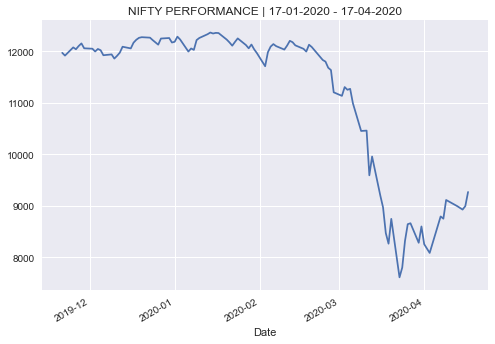

In [4]:
nifty_apr_20.tail(100).plot()
plt.title('NIFTY PERFORMANCE | 17-01-2020 - 17-04-2020')
plt.savefig('Nift_30days.png')

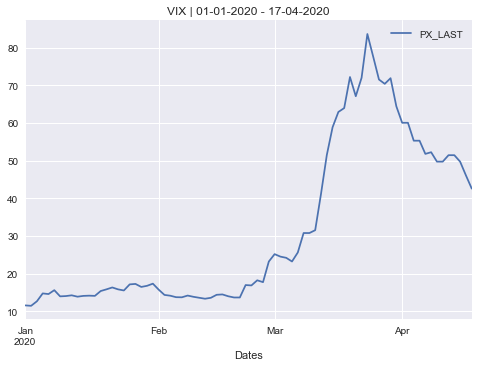

In [5]:
vix['2020':'2020-04-17'].plot()
plt.title('VIX | 01-01-2020 - 17-04-2020')
plt.savefig('VIX_30days.png')

### Exhibit 1: State your informed prediction, with justification. Accordingly, discuss the ways you expect option prices to get affected by these underlying variables

When the lockdown was announced on the 23rd of March by PM Modi, the VIX saw a maximum at 83.6075. With the increasing tensions between the OPEC countries, we can expect the NIFTY to remain volatile in the short term. We can assume interest rates to remain low since the Reserve Bank to remain conservative and not add fuel to the fire by creating an additional crunch in the market especially when the US is planning on stimulus checks. We can hope for help from their side to increase liquidity and spending. 

Finally We are taking a short term option strategy, since the markets are very volatile. Nifty had fallen drastically since end of March. And with the present market, we think that we can get the index at a value, and we believe that the market will rebound by the very same value investors participating in the market. Economists are also speaking of a V shaped recovery happening and an early onset of that is being since the market since the dip in March. 

Since index options in India are European Vanilla without any dividents, that is beyond the scope of discussion. 

In the case of NIFTY Options:

The decrease in S can decrease call option price, but this is good for our contrarian strategy if we are long on the call and vice versa for the put. Since volatility is an all time high, this would reflect in the option price by an increase in both put and call options. The possible reduction in rfr, though speculative can have a negative impact on call and positive impact on put prices.

In [6]:
print(f'The INDIA VIX was at a maximum value on {vix["2019":"2020"].idxmax()["PX_LAST"]} at {vix["2019":"2020"].max()["PX_LAST"]}')

The INDIA VIX was at a maximum value on 2020-03-24 00:00:00 at 83.6075


### Exhibit 2: Propose two option trading strategies to take advantage of the prediction made by you – one strategy for profiting from the predicted direction of equity markets and second strategy to profit from the expected volatility of the equity markets. The strategies should specify all parameters of options, viz., strike price, maturity date, numbers of options contracts, etc

In [7]:
S = nifty_apr_20[-1]
std = vix_apr_20.iloc[-1]['PX_LAST'] / 100
T = 90 / 360
# assuming a wiener process
print(f"Closing Price of Nifty on April 17 : {nifty_apr_20[-1]}")
print(f"Implied Volatility of Nifty on April 17 : {std}")

Closing Price of Nifty on April 17 : 9266.75
Implied Volatility of Nifty on April 17 : 0.425925


We propose the following strategies:

1. Since we are bullish on the market and since the market is extremely volatile, our directional strategy would be a Call Bull Spread.
    
    In this case, we will be buying a call option with a lower strike price and sell a call option with a higher strike price and the same maturity.
    
        Option 1: 
        TYPE : NIFTY CALL OPTION
        K1 = 8700
        Maturity = Apr 24 2020
        T = 7/252 (in years)
        Number of contracts = 1 (50 units of Nifty)
        STATUS : LONG

        Option 2:
        TYPE : NIFTY CALL OPTION
        K2 = 9700
        Maturity = Apr 24 2020
        T = 7/252 (in years)
        Number of contracts = 1 (50 units of Nifty)
        Status : SHORT

2. For our volatility based strategy, we are going for a long strap.

    In this case, we will be buying two Nifty call options and one Nifty put option with the same strike price and the same maturity.

        Option 1: 
        TYPE : NIFTY CALL OPTION
        K1 = 10500
        Maturity = Apr 24 2020
        T = 7/252 (in years)
        Number of contracts = 2 (100 units of Nifty)
        STATUS : LONG

        Option 2:
        TYPE : NIFTY PUT OPTION
        K2 = 10500
        Maturity = Apr 24 2020
        T = 7/252 (in years)
        Number of contracts = 1 (50 units of Nifty)
        Status : LONG

### Exhibit 3: Explicitly calculate the investment required to execute the strategy in the closing minutes of Friday’s trade – use the BS formula – download any required data and clearly mention the source. For volatility, use the IVIX data.

In [8]:
# Black Scholes Valuation Model

def N(z):
    '''
    Normal cumulative density function which returns the 
    cumulative density under the normal curve along the 
    point 'z' where the cumulative density is calculated.
    Refer to scipy.stats documentation for more information
    '''
    from scipy.stats import norm

    return norm.cdf(z)


def call_value(S, K, r, t, vol):
    '''
    Returns the Black-Scholes call option value where
    the parameters have their usual meanings.

    :param S : Underlying stock price
    :param K : Strike price
    :param r : Risk free rate (Usually treasury bond rates or bank rates)
    :param vol : volatility of the stock
    :param t : time to expiration (T - t in documentation)
    '''
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S / K) + t * (r + (vol ** 2.0) / 2))
    d2 = d1 - vol * np.sqrt(t)

    return N(d1) * S - N(d2) * K * np.exp(-r * t)

def put_value(S, K, r, t, vol):
    '''
    Returns the Black-Scholes put option value where
    the parameters have their usual meanings.

    :param S : Underlying stock price
    :param K : Strike price
    :param r : Risk free rate (Usually treasury bond rates or bank rates)
    :param vol : volatility of the stock
    :param t : time to expiration (T - t in documentation)
    '''
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S / K) + t * (r + (vol ** 2.0) / 2))
    d2 = d1 - vol * np.sqrt(t)

    return  N(-d2) * K * np.exp(-r * t) - N(-d1) * S

### 3.1 Call Bull Spread 

        Option 1: 
        TYPE : NIFTY CALL OPTION
        K1 = 8700
        Maturity = Apr 24 2020
        T = 7/252 (in years)
        Number of contracts = 1 (250 units of Nifty)
        STATUS : LONG

        Option 2:
        TYPE : NIFTY CALL OPTION
        K2 = 9700
        Maturity = Apr 24 2020
        T = 7/252 (in years)
        Number of contracts = 1 (250 units of Nifty)
        Status : SHORT

In [9]:
# Option 1
K1 = 8700
T = 7/252
r = 0.041 # https://fred.stlouisfed.org/series/INDIR3TIB01STM
vol = std # implied volatility from IVIX on April 17th
S = nifty_apr_20[-1] # Nifty Closing Price on April 17th

# price from BSM formula 
option_1_price = call_value(S, K1, r, T,vol)

# Option 2
K2 = 9700
T = 7/252
r = 0.033
vol = std # implied volatility from IVIX on April 17th
S = nifty_apr_20[-1] # Nifty Closing Price on April 17th

# price from BSM formula 
option_2_price = call_value(S, K2, r, T,vol)

print('Black-Scholes Call Value of Option 1: ', round(option_1_price, 2))
print('Black-Scholes Call Value of Option 2 : ', round(option_2_price, 2))

total_initial_cash_outflow_bull_spread = option_1_price - option_2_price
lot_size = 50
print('Total Initial Cash Outflow : ', round(total_initial_cash_outflow_bull_spread, 2))
print('Total Cash Used (outflow * lotsize) :', round(total_initial_cash_outflow_bull_spread, 2) * lot_size )

Black-Scholes Call Value of Option 1:  640.01
Black-Scholes Call Value of Option 2 :  107.86
Total Initial Cash Outflow :  532.15
Total Cash Used (outflow * lotsize) : 26607.5


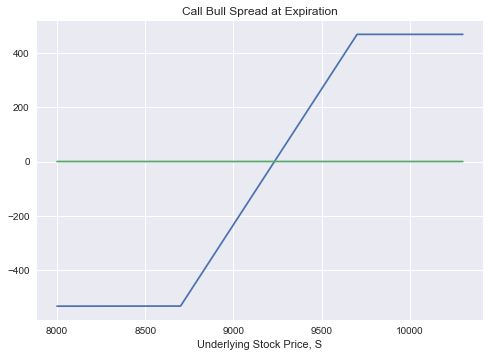

In [10]:
def call_bull_spread(S, K1, K2, call_price_1, call_price_2):
    call_payoff = lambda S, K: np.maximum(S - K, 0.0)
    bull_spread_payoff = call_payoff(S, K1) - call_price_1 - (call_payoff(S, K2) - call_price_2)
    return bull_spread_payoff

S_ = np.arange(8000, 10300, 0.01)

plt.title('Call Bull Spread at Expiration')
plt.xlabel('Underlying Stock Price, S')
plt.plot(S_, call_bull_spread(S_, K1, K2, option_1_price, option_2_price))
plt.plot(S_, [0] * len(S_))
plt.savefig('bullspread.png')

### 3.2 Long Strap

        Option 1: 
        TYPE : NIFTY CALL OPTION
        K1 = 10500
        Maturity = Apr 24 2020
        T = 7/252 (in years)
        Number of contracts = 2 (500 units of Nifty)
        STATUS : LONG

        Option 2:
        TYPE : NIFTY PUT OPTION
        K2 = 10500
        Maturity = Apr 24 2020
        T = 7/252 (in years)
        Number of contracts = 1 (250 units of Nifty)
        Status : LONG

In [11]:
# Option 1
K1 = 10500
T = 7/252
vol = std # implied volatility from IVIX on April 17th
S = nifty_apr_20[-1] # Nifty Closing Price on April 17th

# price from BSM formula 
option_1_price = call_value(S, K1, r, T,vol)

# Option 2
K2 = 10500
T = 7/252
vol = std # implied volatility from IVIX on April 17th
S = nifty_apr_20[-1] # Nifty Closing Price on April 17th

# price from BSM formula 
option_2_price = put_value(S, K2, r, T,vol)

print('Black-Scholes Call Value of Option 1: ', round(option_1_price, 2))
print('Black-Scholes Put Value of Option 2: ', round(option_2_price, 2))

total_initial_cash_outflow_long_strap = 2 * option_1_price + option_2_price

print('Total Initial Cash Outflow : ', round(total_initial_cash_outflow_long_strap, 2))
print('Total Cash Used (outflow * lotsize) :', round(total_initial_cash_outflow_long_strap, 2) * lot_size )

Black-Scholes Call Value of Option 1:  11.39
Black-Scholes Put Value of Option 2:  1235.02
Total Initial Cash Outflow :  1257.81
Total Cash Used (outflow * lotsize) : 62890.5


### Exhibit 4: Prepare a risk report on your overall trade decision, based on possible future moves of underlying, volatility, risk free rate, etc.

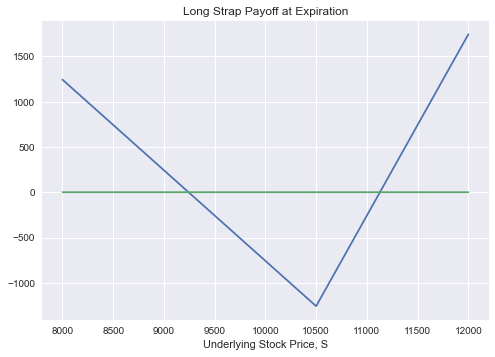

In [12]:
def long_strap(S, K, call_price, put_price):
    call_payoff = lambda S, K: np.maximum(S - K, 0.0) - call_price
    put_payoff = lambda S, K: np.maximum(K - S, 0.0) - put_price
    strap_payoff = 2 * call_payoff(S, K) + put_payoff(S, K)
    return strap_payoff

S_ = np.arange(8000, 12000, 0.01)

plt.title('Long Strap Payoff at Expiration')
plt.xlabel('Underlying Stock Price, S')
plt.plot(S_, long_strap(S_, K1, option_1_price, option_2_price))
plt.plot(S_, [0] * len(S_))
plt.savefig('strap.png')

### Exhibit 5: Evaluate the performance of the option trades set up by you at the end of next Friday, based on data till that date. Discuss the causes behind such performance, whether positive or negative.

In [13]:
S_t = nifty['2020-04-24']
S_t

9154.400391

### 5.1 Call Bull Spread

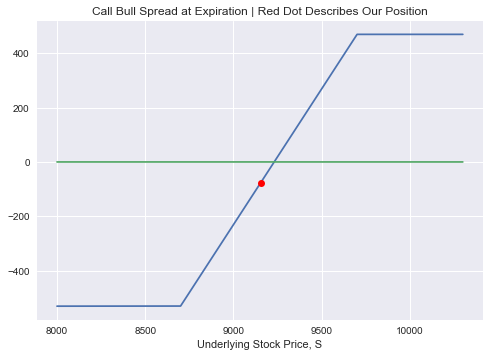

In [14]:
S_ = np.arange(8000, 10300, 0.01)

# Option 1
K1 = 8700
T = 7/252
vol = std # implied volatility from IVIX on April 17th
S = nifty_apr_20[-1] # Nifty Closing Price on April 17th

# price from BSM formula 
option_1_price = call_value(S, K1, r, T,vol)

# Option 2
K2 = 9700
T = 7/252
vol = std # implied volatility from IVIX on April 17th
S = nifty_apr_20[-1] # Nifty Closing Price on April 17th

# price from BSM formula 
option_2_price = call_value(S, K2, r, T,vol)

total_initial_cash_outflow_bull_spread = option_1_price - option_2_price

plt.title('Call Bull Spread at Expiration | Red Dot Describes Our Position')
plt.xlabel('Underlying Stock Price, S')
plt.plot(S_, call_bull_spread(S_, K1, K2, option_1_price, option_2_price))
plt.plot(S_, [0] * len(S_))
plt.plot([S_t], [call_bull_spread(S_t, K1, K2, option_1_price, option_2_price)], marker = 'o', color = 'red')
plt.savefig('bullspreadfinal.png')

In [15]:
lot_size = 50
print(f'The final amount the fund made through the Call Bull Spread : {round(call_bull_spread(S_t, K1, K2, option_1_price, option_2_price) * lot_size, 2)}')

The final amount the fund made through the Call Bull Spread : -3809.63


### 5.2 Long Strap

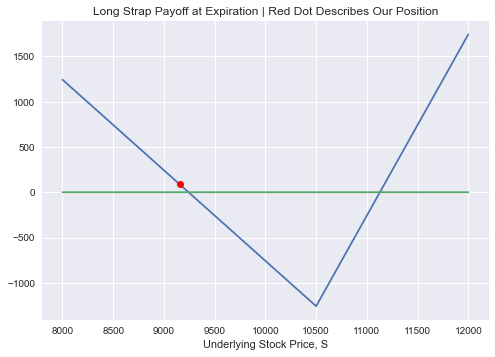

In [18]:
# Option 1
K1 = 10500
T = 7/252
vol = std # implied volatility from IVIX on April 17th
S = nifty_apr_20[-1] # Nifty Closing Price on April 17th

# price from BSM formula 
option_1_price = call_value(S, K1, r, T,vol)

# Option 2
K2 = 10500
T = 7/252
vol = std # implied volatility from IVIX on April 17th
S = nifty_apr_20[-1] # Nifty Closing Price on April 17th

# price from BSM formula 
option_2_price = put_value(S, K2, r, T,vol)

total_initial_cash_outflow_long_strap = 2 * option_1_price + option_2_price

S_ = np.arange(8000, 12000, 0.01)

plt.title('Long Strap Payoff at Expiration | Red Dot Describes Our Position')
plt.xlabel('Underlying Stock Price, S')
plt.plot(S_, long_strap(S_, K1, option_1_price, option_2_price))
plt.plot([S_t], [long_strap(S_t, K1, option_1_price, option_2_price)], marker = 'o', color = 'red')
plt.plot(S_, [0] * len(S_))
plt.savefig('strapfinal.png')

In [17]:
print(f'The final amount the fund made through the Long Strap : {round(long_strap(S_t, K1, option_1_price, option_2_price) * lot_size, 2)}')

The final amount the fund made through the Long Strap : 4389.28
